In [24]:
import torch

from dataclasses import dataclass
from typing import Optional, Union
from diffusers.utils import BaseOutput

@dataclass
class ModelKey(BaseOutput):
    author: str = "GrafikXxxxxxxYyyyyyyyyyy"
    model_path: str = "GrafikXxxxxxxYyyyyyyyyyy/sdxl_Juggernaut"
    model_type: str = "sdxl"
    device: str = "cuda"
    dtype: torch.dtype = torch.float16
    scheduler_name: Optional[str] = "euler_a"

In [25]:
from YggDrasill.core.models.noise_scheduler import NoiseScheduler

scheduler = NoiseScheduler(**ModelKey())

Scheduler has successfully changed to 'euler_a'


In [26]:
from YggDrasill.core.pipelines.forward_diffusion import ForwardDiffusion, ForwardDiffusionInput

forward = ForwardDiffusion(**ModelKey())

Scheduler has successfully changed to 'euler_a'


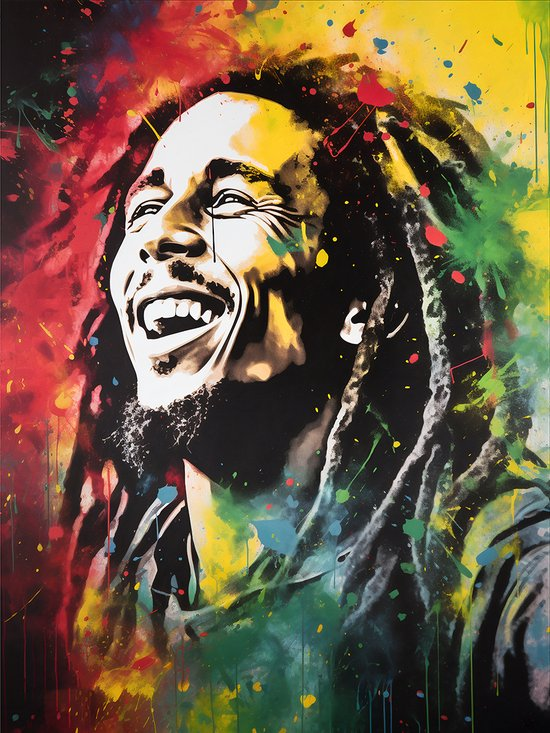

In [27]:
import torch
from diffusers.utils import load_image

image = load_image("https://media.s-bol.com/3pP6QKrPl9XO/J0zBky/550x733.jpg")
image

In [28]:
from YggDrasill.core.pipelines.vae_pipeline import VaePipeline

vae_pipe = VaePipeline()
image = vae_pipe(
    image=image,
).image_latents.to("cuda")

forward_input = ForwardDiffusionInput(
    width = image.shape[3],  
    height = image.shape[2],
    strength = 0.9,
    num_inference_steps=200,
    denoising_end = None,
    denoising_start = 0.95,
    sample = image
)

tensor([46., 41., 36., 31., 26., 21., 16., 11.,  6.,  1.], device='cuda:0')


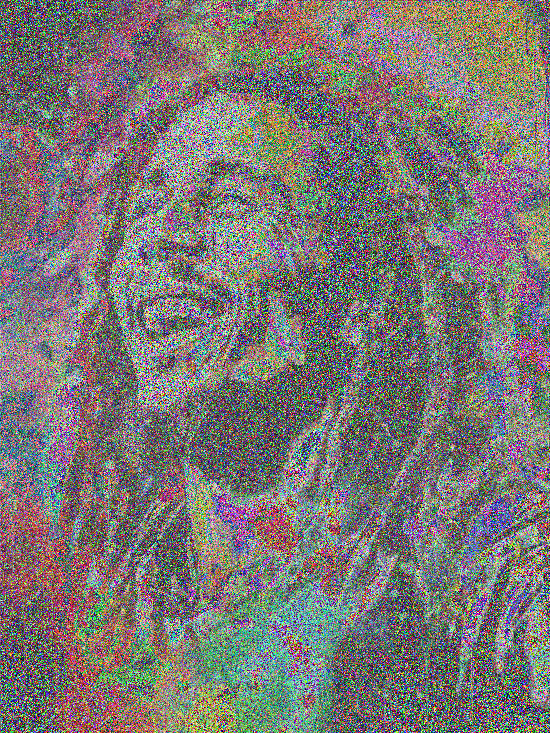

In [29]:
import torch
import torchvision.transforms as transforms

image = transforms.ToPILImage()(
    forward(
        **forward_input
    ).noisy_sample.squeeze(0)
)
print(forward(
        **forward_input
    ).timesteps
)

image
